<a href="https://colab.research.google.com/github/Rudresh99/IOT-Sensor-Prediction/blob/master/IOT_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>                IOT-Sensor Data Analysis Using Keras
# Sensor 
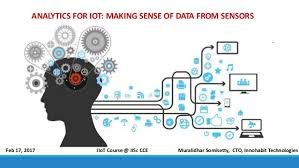


A sensor is a device that detects and responds to some type of input from the physical environment. The specific input could be light, heat, motion, moisture, pressure, or any one of a great number of other environmental phenomena. The output is generally a signal that is converted to human-readable display at the sensor location or transmitted electronically over a network for reading or further processing. 

# Examples :-

Here are a few examples of the many different types of sensors:

1. In a mercury-based glass thermometer, the input is temperature. The liquid contained expands and contracts in response, causing the level to be higher or lower on the marked gauge, which is human-readable. 

2. An oxygen sensor in a car's emission control system detects the gasoline/oxygen ratio, usually through a chemical reaction that generates a voltage. A computer in the engine reads the voltage and, if the mixture is not optimal, readjusts the balance. 

3. Motion sensors in various systems including home security lights, automatic doors and bathroom fixtures typically send out some type of energy, such as microwaves, ultrasonic waves or light beams and detect when the flow of energy is interrupted by something entering its path. 

4. A photosensor detects the presence of visible light, infrared transmission (IR), and/or ultraviolet (UV) energy.

# PIR Sensor

A passive infrared sensor **(PIR sensor)** is an electronic sensor that measures infrared (IR) light radiating from objects in its field of view. They are most often used in PIR-based motion detectors. PIR sensors are commonly used in security alarms and automatic lighting applications.

![PIR Sensor](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-br9udpagzwMA-06MHwYlBuneEHvzQJAPiw&usqp=CAU)





# # OBJECTIVE :- 
# Our Goal is to predict that the person is present near to the sensor or not using our machine learning knowledge 

# 1). Import Google Drive to Access the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2). Importing all the nessecary libraries which is needed for the processing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3). Loading Data from Drive to Notebook for Procesing.

In [3]:
data = pd.read_csv('/content/drive/My Drive/IOT-Data.csv')
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


# 4). Pre-Processing of the Data for Machine Learning Model

In [4]:
data.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,3,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,3,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,2,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,3,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [5]:
data['ts'] = pd.to_datetime(data['ts'])
data.head()


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1970-01-01 00:00:01.590,3,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1970-01-01 00:00:01.590,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1970-01-01 00:00:01.590,3,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1970-01-01 00:00:01.590,2,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1970-01-01 00:00:01.590,3,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [6]:
data.drop(columns=['motion'], inplace=True) 
data.head()

,ts,device,co,humidity,light,lpg,smoke,temp
0,1970-01-01 00:00:01.590,3,0.004956,51.000000,False,0.007651,0.020411,22.700000
1,1970-01-01 00:00:01.590,1,0.002840,76.000000,False,0.005114,0.013275,19.700001
2,1970-01-01 00:00:01.590,3,0.004976,50.900000,False,0.007673,0.020475,22.600000
3,1970-01-01 00:00:01.590,2,0.004403,76.800003,True,0.007023,0.018628,27.000000
4,1970-01-01 00:00:01.590,3,0.004967,50.900000,False,0.007664,0.020448,22.600000


In [7]:
col_conversion = LabelEncoder()

In [8]:
data['light'] = col_conversion.fit_transform(data['light'])
category = col_conversion.classes_
print("Category of Columns : ",category)
data.head()

Category of Columns :  [False  True]


,ts,device,co,humidity,light,lpg,smoke,temp
0,1970-01-01 00:00:01.590,3,0.004956,51.000000,0,0.007651,0.020411,22.700000
1,1970-01-01 00:00:01.590,1,0.002840,76.000000,0,0.005114,0.013275,19.700001
2,1970-01-01 00:00:01.590,3,0.004976,50.900000,0,0.007673,0.020475,22.600000
3,1970-01-01 00:00:01.590,2,0.004403,76.800003,1,0.007023,0.018628,27.000000
4,1970-01-01 00:00:01.590,3,0.004967,50.900000,0,0.007664,0.020448,22.600000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ts        405184 non-null  datetime64[ns]
 1   device    405184 non-null  int64         
 2   co        405184 non-null  float64       
 3   humidity  405184 non-null  float64       
 4   light     405184 non-null  int64         
 5   lpg       405184 non-null  float64       
 6   smoke     405184 non-null  float64       
 7   temp      405184 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 24.7 MB


# 5). Data Visualization of Data with respect to CO , Temperature and Smoke

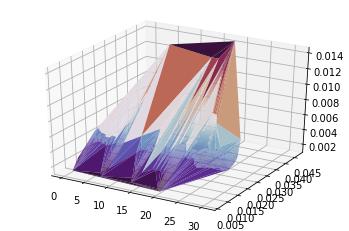

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surface = ax.plot_trisurf(data['temp'],data['smoke'],data['co'],cmap = plt.cm.twilight_shifted)
plt.show()

# 6). Seprating the data into input and output format.

In [11]:
X = data.drop(columns=['ts','light'])
y = data[['light']].values


# 7). Spliting the data into Training and Testing for train and test the Model

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 12)

# 8). Importing Advance Computational Library Keras for Model defining.

In [13]:
from keras.models import Sequential
from keras.layers import *

# Model Defining

In [14]:
model = Sequential()
model.add(Dense(50,input_dim=6,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(1,activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                350       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="mean_squared_error",optimizer="adam", metrics=['accuracy'])


# 9). Fitting the Training Data into our Model.

In [16]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    shuffle=True,
    verbose=2,
    batch_size = 5

)

Epoch 1/5
64830/64830 - 126s - loss: 0.0218 - accuracy: 0.9782
Epoch 2/5
64830/64830 - 122s - loss: 0.0164 - accuracy: 0.9833
Epoch 3/5
64830/64830 - 122s - loss: 0.0162 - accuracy: 0.9835
Epoch 4/5
64830/64830 - 121s - loss: 0.0163 - accuracy: 0.9833
Epoch 5/5
64830/64830 - 122s - loss: 0.0162 - accuracy: 0.9834


# 10).  Visualize the Loss of the Model

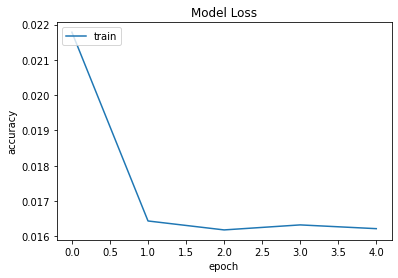

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 11). Evaluate the Model on the Testing Data

In [18]:
test_error_rate=model.evaluate(X_test,y_test,verbose=0)
print("The Mean Squared Error (MSE) for the test dataset is : {}".format(test_error_rate[0]))

The Mean Squared Error (MSE) for the test dataset is : 0.016096532344818115


# 12). Applying new data on our Machine Learning Model .

In [19]:
new_data = pd.read_excel('/content/drive/My Drive/new data.xlsx')
new_data.head()

,device,co,humidity,lpg,smoke,temp
0,2,0.004383,78,0.007000,0.018563,27.0
1,1,0.004551,72,0.006585,0.012549,28.1
2,3,0.002458,77,0.008954,0.036549,26.9
3,1,0.003555,51,0.245880,0.214558,29.9
4,3,0.354880,65,0.144896,0.524698,26.5


# 13). Making Prediction on the new data

In [20]:
Prediction = model.predict(new_data)
Prediction

array([[1.0021636 ],
       [0.02549177],
       [1.1542645 ],
       [0.02549177],
       [0.94026357],
       [0.9500467 ]], dtype=float32)

# 14). Final Predition of the Model that Wheather the Person is Present or not. 

In [21]:
for i in Prediction:
  if i >= 0.5:
    print("Person is Present ")
  else:
    print("Person is not Present")

Person is Present 
Person is not Present
Person is Present 
Person is not Present
Person is Present 
Person is Present 


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSVEWfCDSAX1UWRPl-xwzxP3sqSG5saq8NrrQ&usqp=CAU)
# Now you Can Predict 

# Apply on your new dataset and have fun 

![gr](https://user-images.githubusercontent.com/52448964/89741331-ff8f4c00-daad-11ea-9eb1-8e2a5c9c4951.jpg)

# Thank You 
# Model Created by: Rudresh Joshi { Tuscon }
